<a href="https://colab.research.google.com/github/YashBurman1/MiniProjects/blob/main/Time_series_Analysis_bitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and Installing Necessary Libraries ##

In [2]:
!nvidia-smi

Sat Mar 22 09:45:22 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        On  |   00000000:08:00.0  On |                  N/A |
| 30%   35C    P8             25W /  350W |     376MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#plt.style.use('bmh')

In [4]:
pd.options.mode.use_inf_as_na = True

In [5]:
%pip install pmdarima


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install opendatasets


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install statsmodels 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## **IMPORTING THE DATASET**

In [9]:
import opendatasets as od

In [10]:
od.download("https://www.kaggle.com/datasets/nisargchodavadiya/bitcoin-time-series-with-different-time-intervals")

Skipping, found downloaded files in "./bitcoin-time-series-with-different-time-intervals" (use force=True to force download)


In [11]:
file = ('./bitcoin-time-series-with-different-time-intervals/BTC-USD-1-DAY.csv')
df =  pd.read_csv(file)

In [12]:
print(df.iloc[28])

Date            2020-01-29
Open           9357.470703
High           9406.431641
Low            9269.467773
Close          9316.629883
Adj Close      9316.629883
Volume       30682598115.0
Name: 28, dtype: object


## **DATA PREPROCESSING**

In [13]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'],utc =True)
df.dtypes 

Date         datetime64[ns, UTC]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                   float64
dtype: object

In [15]:
df.set_index("Date",inplace = True)
df.shape

(666, 6)

In [16]:
df_ = df[["Adj Close"]]
df_.replace([np.inf, -np.inf], np.nan, inplace=True)
df_.dropna()
df_

/tmp/ipykernel_401/3671523393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.replace([np.inf, -np.inf], np.nan, inplace=True)


,Adj Close
Date,
2020-01-01 00:00:00+00:00,7200.174316
2020-01-02 00:00:00+00:00,6985.470215
2020-01-03 00:00:00+00:00,7344.884277
2020-01-04 00:00:00+00:00,7410.656738
2020-01-05 00:00:00+00:00,7411.317383
...,...
2021-10-23 00:00:00+00:00,61393.617188
2021-10-24 00:00:00+00:00,60930.835938
2021-10-25 00:00:00+00:00,63039.824219


In [17]:
df_1 = df_.dropna(axis = 0)

 **Testing for Stationarity Using Dickey-Fuller test**

In [18]:
from statsmodels.tsa.stattools import adfuller 

In [19]:
adf_,pvalue_,used_lag,nobs,critical_values_,ic_best_ = adfuller(df_1)
if pvalue_ > 0.05:
  print("The data is not stationary")
else:
  print("The data is stationary")

The data is not stationary


In [20]:
pvalue_

0.9199439681135786

In [21]:
df_1["year"] = [d.year for d in df_1.index]
df_1["Month"] = [d.strftime("%b") for d in df_1.index]


/tmp/ipykernel_401/3710944825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["year"] = [d.year for d in df_1.index]
/tmp/ipykernel_401/3710944825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Month"] = [d.strftime("%b") for d in df_1.index]


In [22]:
df_1.dtypes

Adj Close    float64
year           int64
Month         object
dtype: object

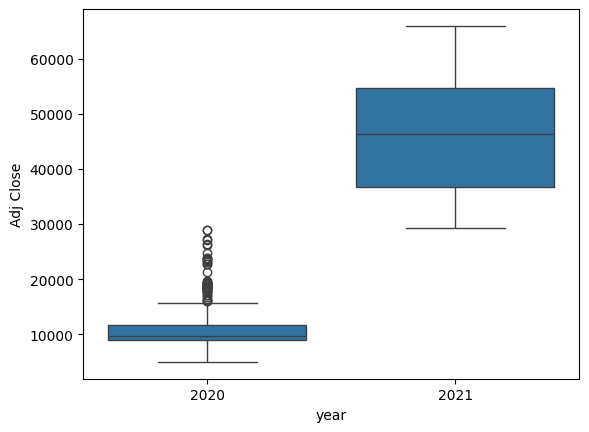

In [23]:
sns.boxplot(x = "year", y = "Adj Close",data = df_1);

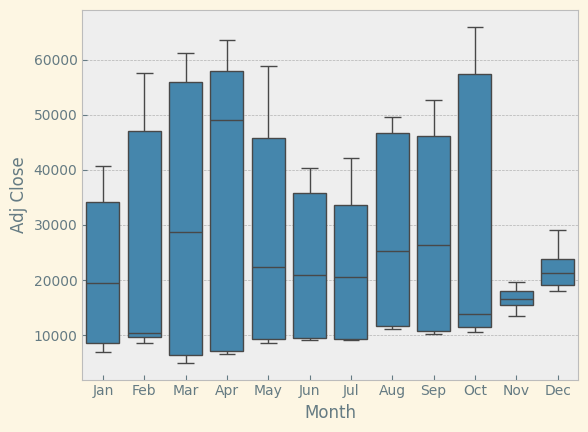

In [45]:
sns.boxplot(x = "Month", y = "Adj Close",data = df_1);

**Decoposing the Time Series into Trend , Seasonality and Residual**

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
df.index = pd.to_datetime(df.index,utc =True)

In [38]:
decompose = seasonal_decompose(df_1["Adj Close"],model = "additive",period = 30)
trend = decompose.trend
seasonal = decompose.seasonal 
residual = decompose.resid

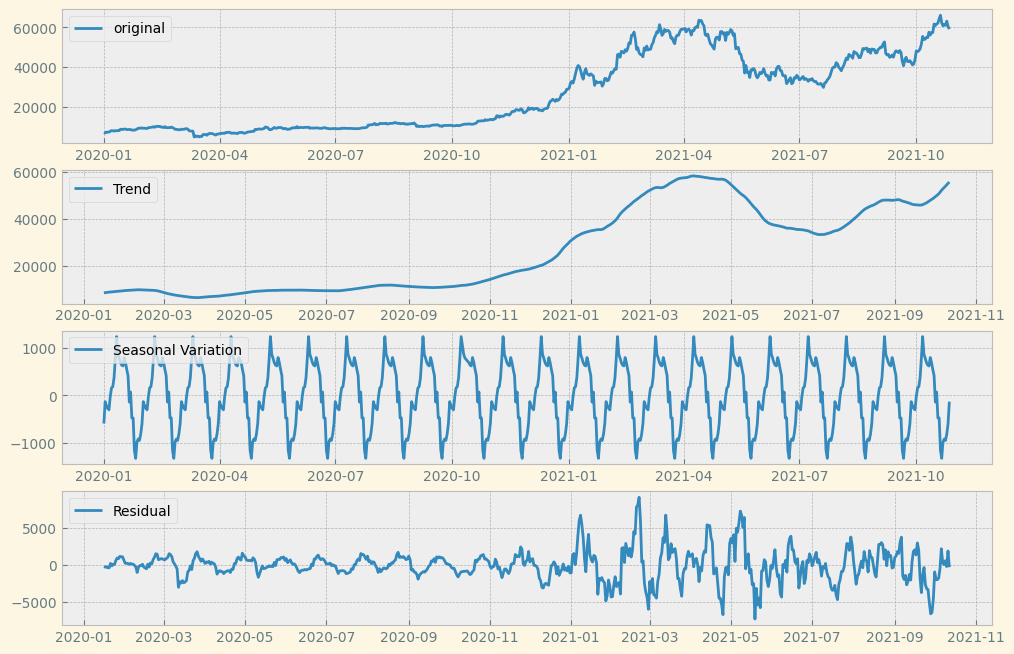

In [120]:
plt.figure(figsize = (12,8))
plt.subplot(411)
plt.plot(df_1["Adj Close"],label = "original")
plt.legend(loc = "upper left",labelcolor="black")
plt.subplot(412)
plt.plot(trend,label = "Trend")
plt.legend(loc = "upper left",labelcolor="black")
plt.subplot(413)
plt.plot(seasonal,label = "Seasonal Variation")
plt.legend(loc = "upper left",labelcolor="black")
plt.subplot(414)
plt.plot(residual,label = "Residual")
plt.legend(loc = "upper left",labelcolor="black")
plt.show()

## **FITTING A TIME SERIES MODEL**

In [26]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [27]:
df_1.shape


(658, 5)

In [57]:
n = 30
train = df_1.head(df_1.shape[0]-n)
test = df_1.tail(n)

In [75]:
arima_model = auto_arima(train["Adj Close"],start_p = 1 , d = 1 , start_q = 1,
                                           max_p = 7 ,max_d = 7, max_q = 7, m = 12,
                                           start_P = 0, D =1 , start_Q=0,
                                           max_P = 7, max_D = 7, max_Q = 14,
                                           seasonal = True, trace = True, error_action = "ignore", suppress_warnings = True, stepwise = True , n_fits = 5)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=10988.529, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10992.257, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10736.403, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10986.828, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=10695.244, Time=1.31 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=10653.728, Time=3.84 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=10640.910, Time=6.99 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=10639.756, Time=11.55 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=10624.882, Time=18.01 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=10619.199, Time=31.45 sec
 ARIMA(1,1,0)(7,1,1)[12]             : AIC=inf, Time=68.10 sec
 ARIMA(1,1,0)(6,1,1)[12]             : AIC=inf, Time=38.51 sec
 ARIMA(0,1,0)(7,1,0)[12]             : AIC=10622.896, Time=8.56 sec
 ARIMA(2,1,0)(7,1,

**Best model:  ARIMA(1,1,0)(7,1,0)**          
**Total fit time: 411.984 seconds**

# Forecasting #

## Simple Fore casting without expanding window

In [53]:
best_order = arima_model.order
print(f"Best ARIMA Order: {best_order}")

Best ARIMA Order: (7, 1, 0)


In [79]:
y_pred_arima = arima_model.predict(test.shape[0])

/usr/local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


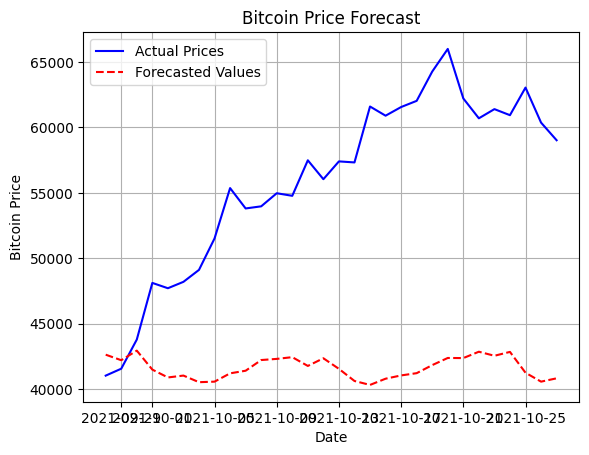

In [80]:

plt.plot(test.index, test["Adj Close"], label="Actual Prices", color="blue", linestyle="-")
plt.plot(test.index, y_pred_arima, label="Forecasted Values", color="red", linestyle="--")

plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price Forecast",color="black")
plt.legend(labelcolor="black")
plt.grid()
plt.show()

## Forecasting with an Expanding Window

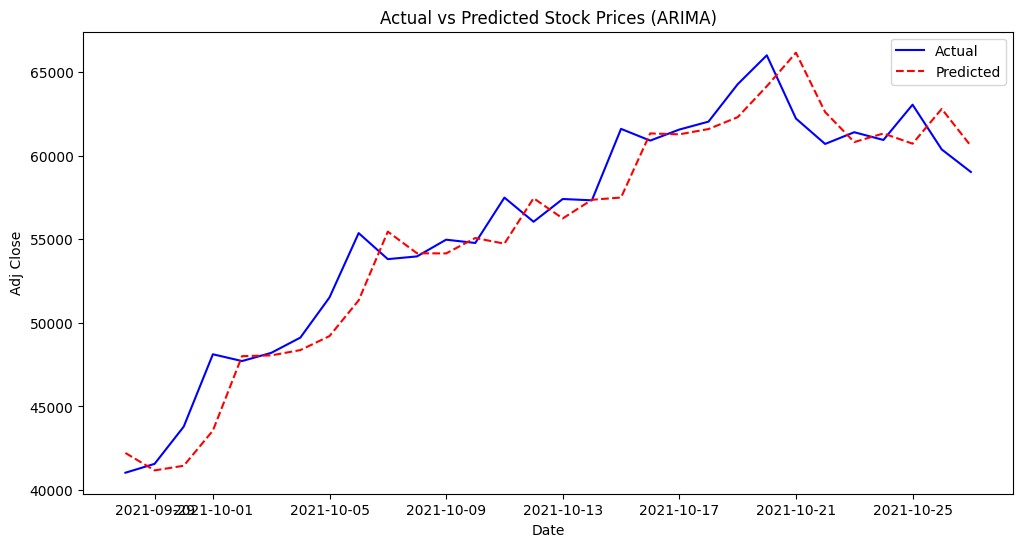

In [34]:
df_1 = df_1.sort_index()
series = df_1['Adj Close']

train_size = len(series) - 30
train, test = series.iloc[:train_size], series.iloc[train_size:]

# Walk-forward validation
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(7,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(test.iloc[t])
    #print(f'predicted={yhat:.6f}, expected={test.iloc[t]:.6f}')

#rmse = sqrt(mean_squared_error(test, predictions))
#print(f'Test RMSE: {rmse:.3f}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Stock Prices (ARIMA)')
plt.show()


# Trying ML Algo: XGBoost #

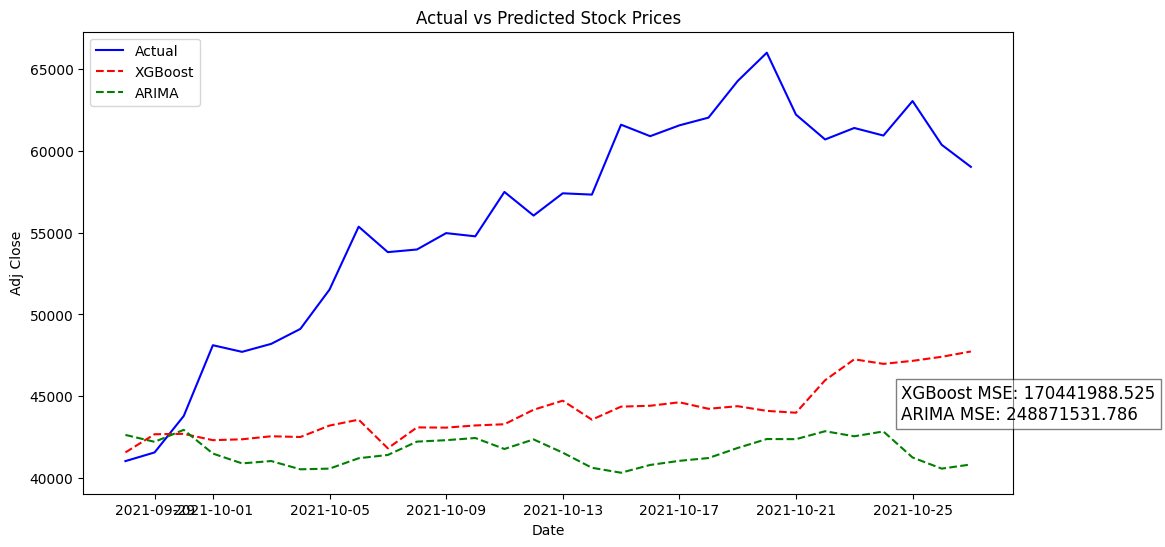

In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


# Apply differencing to make the series stationary
df_1['diff_value'] = df_1['Adj Close'].diff()
df_1 = df_1.dropna()

# Prepare data for supervised learning
df_1['diff_value_lag1'] = df_1['diff_value'].shift(1)
df_1 = df_1.dropna()

# Splitting into train and test sets (last 30 days for testing)
train_size = len(df_1) - 30
train, test = df_1.iloc[:train_size], df_1.iloc[train_size:]

X_train, y_train = train[['diff_value_lag1']].values, train['diff_value'].values
X_test, y_test = test[['diff_value_lag1']].values, test['diff_value'].values

# Initialize an XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_diff = model.predict(X_test)

# Convert predictions back to original scale
y_pred = test['Adj Close'].iloc[0] + np.cumsum(y_pred_diff)

y_pred_series = pd.Series(y_pred, index=test.index)

mse_xgboost = mean_squared_error(test['Adj Close'], y_pred_series)
mse_arima = mean_squared_error(test['Adj Close'], y_pred_arima)

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Adj Close'], label='Actual', color='blue')
plt.plot(y_pred_series.index, y_pred_series, label='XGBoost', color='red', linestyle='dashed')
plt.plot(test.index,y_pred_arima,label='ARIMA',color="green",ls='dashed')

mse_text = f"XGBoost MSE: {mse_xgboost:.3f}\nARIMA MSE: {mse_arima:.3f}"
#plt.text(test.index[int(len(test) * 0.7)], min(test['Adj Close']), mse_text,
#         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.annotate(mse_text, xy=(test.index[-1], test['Adj Close'].min()),xytext=(-50, 30), textcoords='offset points',fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Actual vs Predicted Stock Prices')
plt.show()